In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("online_retail.csv")
df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [92]:
toplam_gelir = df['UnitPrice'].sum()
print(f"toplam gelir:",toplam_gelir)
indirimler = df[df['Description']=='Discount']['UnitPrice'].sum()
print(f"toplam indirim tutarı:",indirimler)

toplam gelir: 2498803.974
toplam indirim tutarı: 5581.3099999999995


In [96]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
satis_2010 =df[df['InvoiceDate'].dt.year == 2010]['UnitPrice'].sum()
satis_2011 =df[df['InvoiceDate'].dt.year == 2011]['UnitPrice'].sum()
print(f"2010 toplam kazanç: {satis_2010},\n2011 toplam kazanç: {satis_2011}")

2010 toplam kazanç: 260520.85000000003,
2011 toplam kazanç: 2238283.124


In [6]:
satis_adet= df['Quantity'].sum()
satis_adet

5176450

In [44]:
aylik_satis = df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m'))['Quantity'].sum().reset_index()

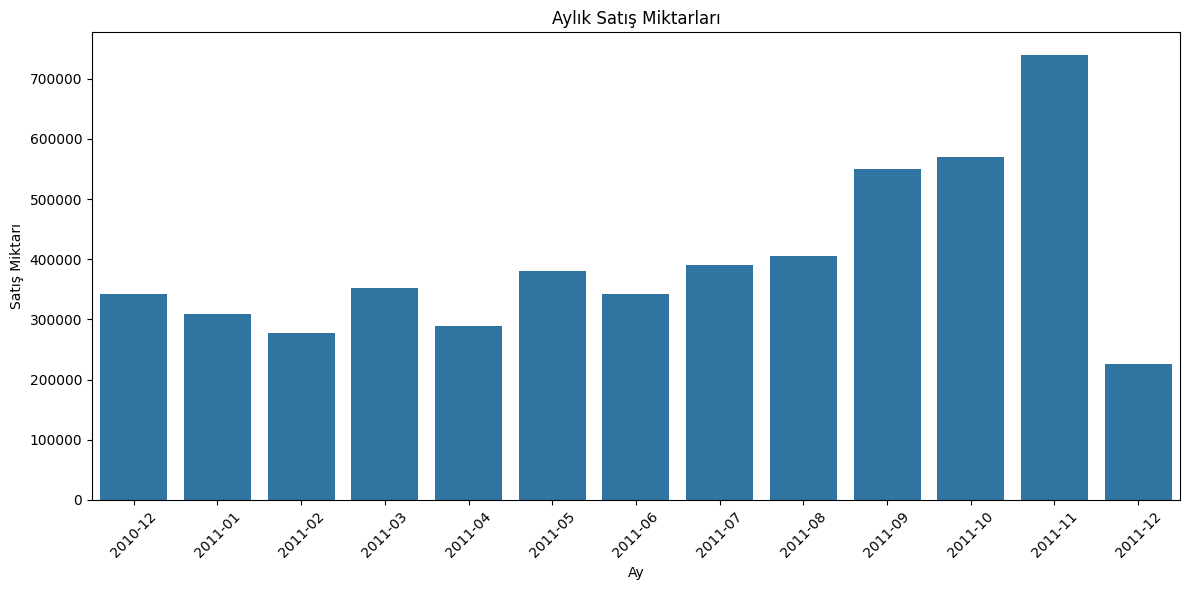

In [46]:
# YIL - AY olarak satış miktarı
plt.figure(figsize=(12, 6))
sns.barplot(aylik_satis, x='InvoiceDate', y='Quantity')

plt.title('Aylık Satış Miktarları')
plt.xlabel('Ay')
plt.ylabel('Satış Miktarı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

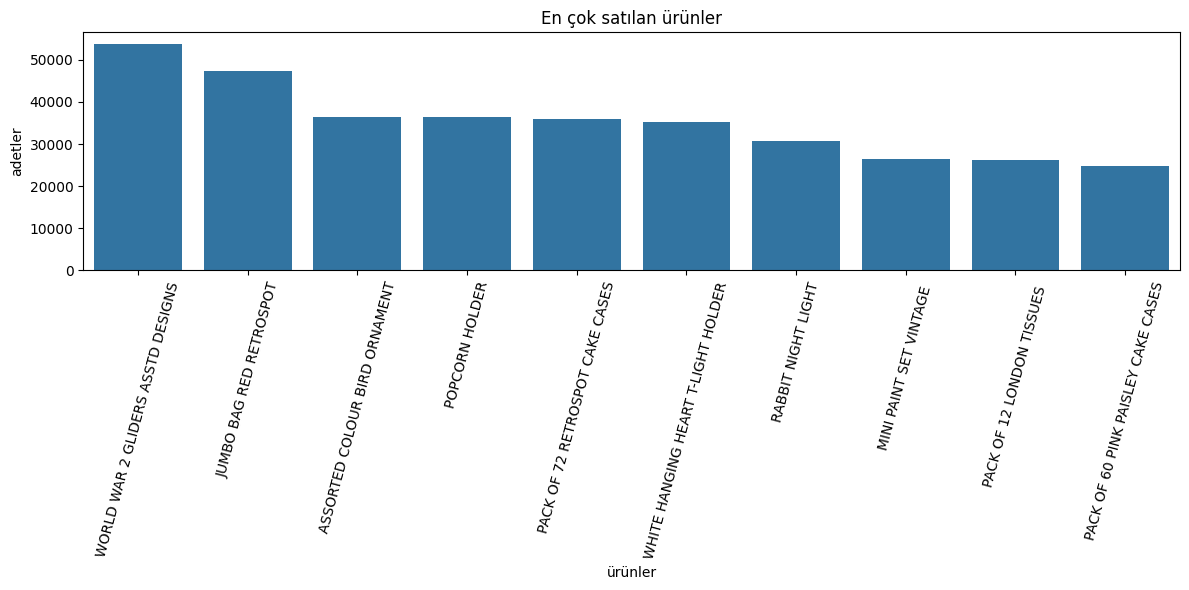

In [65]:
#en çok satan ürünler
df[df['Quantity'] == df['Quantity'].max()]
en_cok_satilan = df.groupby('Description')['Quantity'].sum().reset_index()
en_cok_satilan = en_cok_satilan.sort_values('Quantity', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(en_cok_satilan.head(10),x='Description', y='Quantity')
plt.title("En çok satılan ürünler")
plt.xlabel("ürünler")
plt.ylabel("adetler")
plt.xticks(rotation=75)
plt.tight_layout() # optimizasyon sağlar
plt.show()

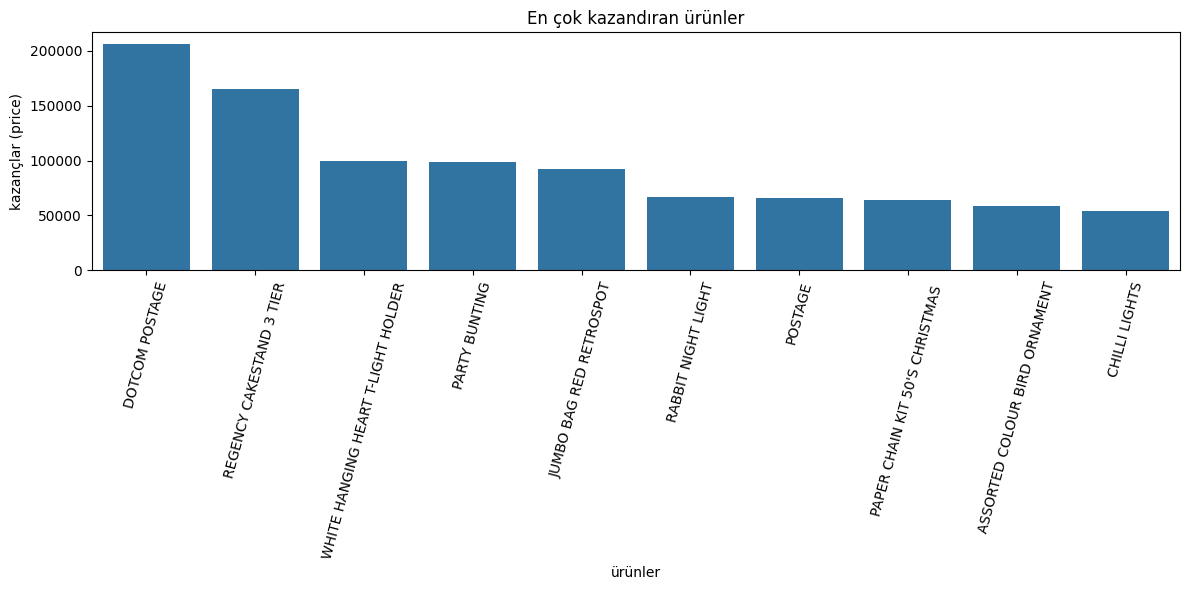

In [90]:
#en çok kazandıran ürün
df['Toplam Kazanç'] = df['UnitPrice']*df['Quantity']
#en_cok_kazandiran= df.groupby('Description')['Quantity'].sum() & ('UnitPrice').sum().reset_index() !HATALI!

en_cok_kazandiran= df.groupby('Description').agg({
    'Quantity': 'sum',
    'Toplam Kazanç': 'sum'
}).reset_index()

en_cok_kazandiran = en_cok_kazandiran.sort_values('Toplam Kazanç', ascending = False)

plt.figure(figsize=(12, 6))
sns.barplot(data=en_cok_kazandiran.head(10),x='Description', y='Toplam Kazanç')
plt.title("En çok kazandıran ürünler")
plt.xlabel("ürünler")
plt.ylabel("kazançlar (price)")
plt.xticks(rotation=75)
plt.tight_layout() # optimizasyon sağlar
plt.show()